# Predict the diabetes based on diagnostic measures

#### About DATA:
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.


The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.


Columns
> 1.Pregnancies = Number of times pregnant

> 2.Glucose = Plasma glucose concentration a 2 hours in an oral glucose tolerance test

> 3.BloodPressure = Diastolic blood pressure (mm Hg)

> 4.SkinThickness = Triceps skin fold thickness (mm)

> 5.Insulin = 2-Hour serum insulin (mu U/ml)

> 6.BMI = Body mass index (weight in kg/(height in m)^2)

> 7.DiabetesPedigreeFunction = Diabetes pedigree function

> 8.Age = Age (years)

> 9.Outcome = Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [20]:
#read the csv file
df=pd.read_csv('diabetes.csv')

In [21]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [4]:
df.tail()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


In [4]:
df.describe()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.809136
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.628517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.906200
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.260800
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,3.900600


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
num_preg        768 non-null int64
glucose_conc    768 non-null int64
diastolic_bp    768 non-null int64
thickness       768 non-null int64
insulin         768 non-null int64
bmi             768 non-null float64
diab_pred       768 non-null float64
age             768 non-null int64
skin            768 non-null float64
diabetes        768 non-null bool
dtypes: bool(1), float64(3), int64(6)
memory usage: 54.9 KB


In [7]:
df.shape

(768, 10)

In [8]:
df.isna().sum()

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
skin            0
diabetes        0
dtype: int64

In [6]:
import pandas_profiling as pp
pp.ProfileReport(df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029782183F48>,
      dtype=object)

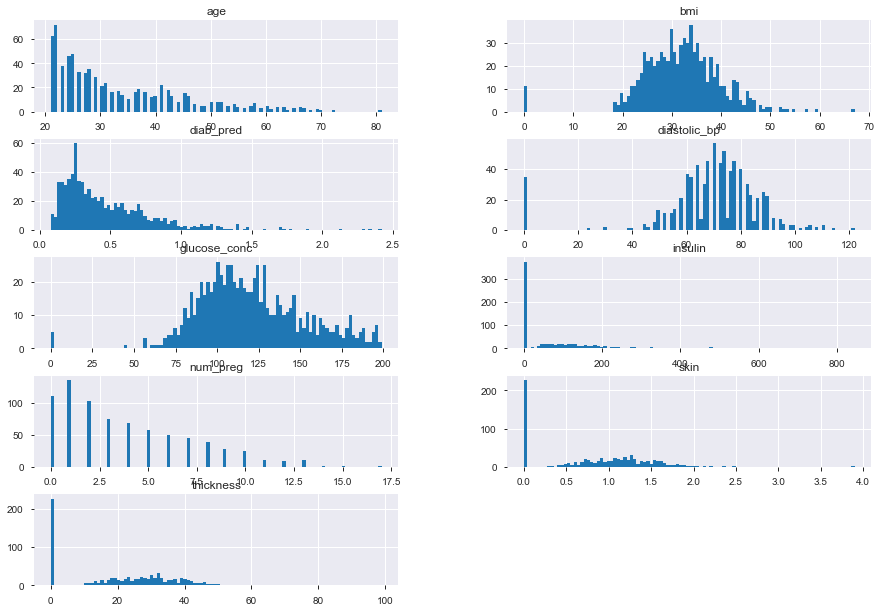

In [10]:
# Histogram

columns = list(df)[0:-1]
df[columns].hist(stacked = False, bins = 100, figsize = (15, 30), layout = (14,2))

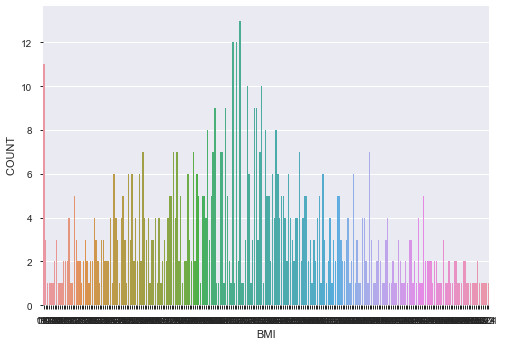

In [11]:
sns.barplot(x= df.bmi.value_counts().index, y = df.bmi.value_counts().values)
plt.xlabel('BMI')
plt.ylabel(" COUNT")
plt.show()

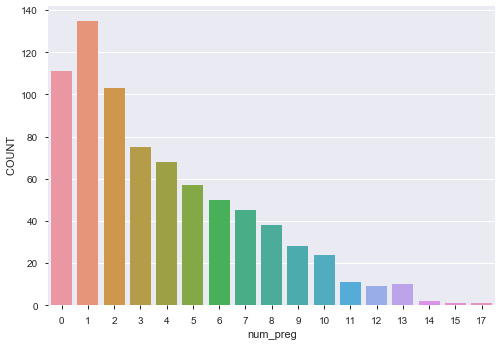

In [12]:
sns.barplot(x= df.num_preg.value_counts().index, y = df.num_preg.value_counts().values)
plt.xlabel('num_preg')
plt.ylabel(" COUNT")
plt.show()

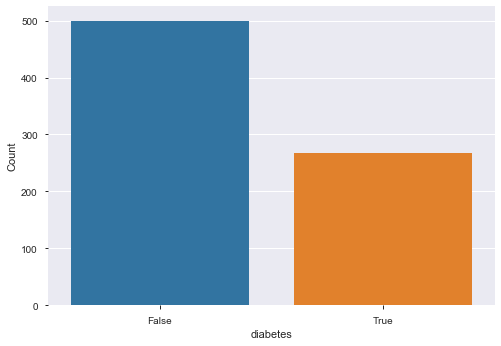

In [13]:
sns.countplot(df.diabetes)
plt.xlabel('diabetes')
plt.ylabel('Count')
plt.show()

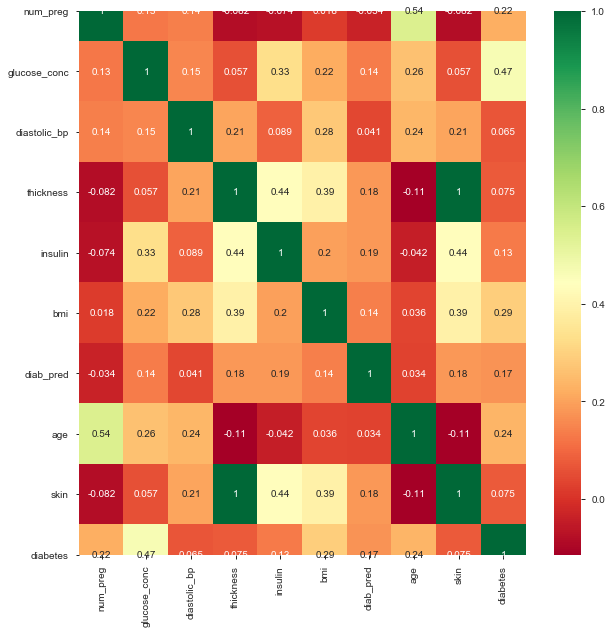

In [14]:
# correlation matrix = corrM
corrM = df.corr()
top_corr_features = corrM.index
plt.figure(figsize= (10,10))
g = sns.heatmap(df[top_corr_features].corr(), annot= True, cmap = 'RdYlGn')

In [22]:
#changing boolean to number

diabetes_map = {True: 1, False: 0}
df['diabetes']= df['diabetes'].map(diabetes_map)

In [23]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
num_preg        768 non-null int64
glucose_conc    768 non-null int64
diastolic_bp    768 non-null int64
thickness       768 non-null int64
insulin         768 non-null int64
bmi             768 non-null float64
diab_pred       768 non-null float64
age             768 non-null int64
skin            768 non-null float64
diabetes        768 non-null int64
dtypes: float64(3), int64(7)
memory usage: 60.1 KB


In [18]:
n_true= len(df.loc[df['diabetes']== True])
n_false= len(df.loc[df['diabetes']== False])

print('Number of True Cases: {0}({1:2.2f}%)'.format(n_true, (n_true/(n_true+n_false))*100))
print('Number of False Cases: {0}({1:2.2f}%)'.format(n_false, (n_false/(n_true+n_false))*100))

Number of True Cases: 268(34.90%)
Number of False Cases: 500(65.10%)


In [24]:
#Building the models

from sklearn.model_selection import train_test_split

In [25]:
#spliting train and test data
x=df.drop(['diabetes'], axis= 1)
y=df.diabetes.values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state= 0)

In [39]:
from sklearn.preprocessing import StandardScaler
# generate an standarScalar
sc_X = StandardScaler()

#StandardScaler return a Numpy Array so we need to convert to a Dataframe
X_train2= pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.fit_transform(X_test))

#copy columns name to the new traning and testing dataset
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values

#copy index to the new traning and testing dataset
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

# reasigned copy dataset to original
X_train = X_train2
X_test = X_test2

In [40]:
X_train

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
603,0.908329,0.915694,0.449124,0.522226,0.373635,0.378526,0.677404,1.699558,0.522226
118,0.036447,-0.751822,-0.472301,0.148149,-0.699657,-0.506672,-0.070497,-0.965692,0.148149
247,-1.126063,1.387632,1.063407,0.771611,5.092711,2.540941,-0.118555,-0.882403,0.771611
157,-0.835435,-0.374271,-0.677062,0.023456,0.450299,-0.886043,1.100914,-0.882403,0.023456
468,1.198956,-0.028183,-3.543717,-1.285816,-0.699657,-0.279050,-0.851438,0.366933,-1.285816
...,...,...,...,...,...,...,...,...,...
763,1.780211,-0.625972,0.346743,1.706805,0.833617,0.087675,-0.887481,2.449160,1.706805
192,0.908329,1.198857,-0.165159,-1.285816,-0.699657,-0.228467,-0.250714,0.200355,-1.285816
629,0.036447,-0.846210,-0.216350,0.085802,-0.699657,-0.949272,-0.956564,-1.048981,0.085802
559,2.070839,-1.129373,0.244363,-1.285816,-0.699657,-0.266404,-0.500014,0.117066,-1.285816


In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [53]:
# support vector

from sklearn.svm import SVC
svm = SVC(random_state= 1)
svm.fit(X_train, y_train)
print("SVC accuracy: {: .2f}%".format(svm.score(X_test, y_test)*100))
y_pred = svm.predict(X_test)
print('Accuracy Score: {} / Precision Score {} / recall_score {}'. format(accuracy_score(y_test, y_pred),
                                                                      precision_score(y_test, y_pred),
                                                                      recall_score(y_test, y_pred)))
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion  matrix:\n {}'.format(cnf_matrix))

SVC accuracy:  78.57%
Accuracy Score: 0.7857142857142857 / Precision Score 0.6842105263157895 / recall_score 0.5531914893617021
Confusion  matrix:
 [[95 12]
 [21 26]]


In [54]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
nb.fit(X_train, y_train)
print("NB accuracy: {: .2f}%".format(nb.score(X_test, y_test)*100))
y_pred = nb.predict(X_test)
print('Accuracy Score: {} / Precision Score {} / recall_score {}'. format(accuracy_score(y_test, y_pred),
                                                                      precision_score(y_test, y_pred),
                                                                      recall_score(y_test, y_pred)))
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion  matrix:\n {}'.format(cnf_matrix))

NB accuracy:  75.97%
Accuracy Score: 0.7597402597402597 / Precision Score 0.5961538461538461 / recall_score 0.6595744680851063
Confusion  matrix:
 [[86 21]
 [16 31]]


In [55]:
#KNN model

from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
print("KNN accuracy: {: .2f}%".format(knn.score(X_test, y_test)*100))
y_pred = knn.predict(X_test)
print('Accuracy Score: {} / Precision Score {} / recall_score {}'. format(accuracy_score(y_test, y_pred),
                                                                      precision_score(y_test, y_pred),
                                                                      recall_score(y_test, y_pred)))
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion  matrix:\n {}'.format(cnf_matrix))

KNN accuracy:  79.87%
Accuracy Score: 0.7987012987012987 / Precision Score 0.66 / recall_score 0.7021276595744681
Confusion  matrix:
 [[90 17]
 [14 33]]


In [56]:
# Random Forest 

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 1)
rf.fit(X_train, y_train)
print("Random Forest accuracy: {: .2f}%".format(rf.score(X_test, y_test)*100))
y_pred = rf.predict(X_test)
print('Accuracy Score: {} / Precision Score {} / recall_score {}'. format(accuracy_score(y_test, y_pred),
                                                                      precision_score(y_test, y_pred),
                                                                      recall_score(y_test, y_pred)))
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion  matrix:\n {}'.format(cnf_matrix))

Random Forest accuracy:  81.17%
Accuracy Score: 0.8116883116883117 / Precision Score 0.6956521739130435 / recall_score 0.6808510638297872
Confusion  matrix:
 [[93 14]
 [15 32]]


In [61]:
rf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [62]:
# Hyperparameter grid RandomizedSearchCV will search over
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

In [63]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split

np.random.seed(42)

# Set n_jobs to -1 to use all cores (NOTE: n_jobs=-1 is broken as of 8 Dec 2019, using n_jobs=1 works)
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=20, # try 20 models total
                            cv=5, # 5-fold cross-validation
                            verbose=2) # print out results

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.5s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.6s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.6s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.6s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.6s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, total=   0.6s
[CV] n_estimators=100, min_samples_split=2, min_

[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, total=   0.1s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, total=   0.1s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, total=   0.1s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   7.9s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   6.8s
[CV] n_estimators=1200, min_samples_split=2, min_samp

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   1.0s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   1.0s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   1.0s
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=None 
[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=None, total=   5.3s
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=None 
[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=None, total=   5.6s
[CV] n_estimators=1200, min_samples_spli

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  4.0min finished


In [64]:
rs_clf.best_params_

{'n_estimators': 500,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 5}

In [65]:
# Random Forest 

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500, min_samples_split=6, min_samples_leaf=2, max_features='sqrt', max_depth=5)
rf.fit(X_train, y_train)
print("Random Forest accuracy: {: .2f}%".format(rf.score(X_test, y_test)*100))
y_pred = rf.predict(X_test)
print('Accuracy Score: {} / Precision Score {} / recall_score {}'. format(accuracy_score(y_test, y_pred),
                                                                      precision_score(y_test, y_pred),
                                                                      recall_score(y_test, y_pred)))
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion  matrix:\n {}'.format(cnf_matrix))

Random Forest accuracy:  81.17%
Accuracy Score: 0.8116883116883117 / Precision Score 0.725 / recall_score 0.6170212765957447
Confusion  matrix:
 [[96 11]
 [18 29]]


In [57]:
# XG boost

import xgboost
xg = xgboost.XGBClassifier()
xg.fit(X_train, y_train)
print(" XG boost: {: .2f}%".format(xg.score(X_test, y_test)*100))
y_pred = xg.predict(X_test)
print('Accuracy Score: {} / Precision Score {} / recall_score {}'. format(accuracy_score(y_test, y_pred),
                                                                      precision_score(y_test, y_pred),
                                                                      recall_score(y_test, y_pred)))
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion  matrix:\n {}'.format(cnf_matrix))

 XG boost:  81.17%
Accuracy Score: 0.8116883116883117 / Precision Score 0.68 / recall_score 0.723404255319149
Confusion  matrix:
 [[91 16]
 [13 34]]


In [66]:
xg.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [67]:
# Hyperparameter grid RandomizedSearchCV will search over
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "learning_rate": [0.1, 0.3, 0.5, 0.7, 1],
        "min_child_weight": [2, 4, 6]
        }

In [69]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split

np.random.seed(42)

# Set n_jobs to -1 to use all cores (NOTE: n_jobs=-1 is broken as of 8 Dec 2019, using n_jobs=1 works)
clf = xgboost.XGBClassifier()

# Setup RandomizedSearchCV
xg_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=20, # try 20 models total
                            cv=5, # 5-fold cross-validation
                            verbose=2) # print out results

# Fit the RandomizedSearchCV version of clf
xg_clf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_estimators=1200, min_child_weight=4, max_depth=10, learning_rate=1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_child_weight=4, max_depth=10, learning_rate=1, total=   1.1s
[CV] n_estimators=1200, min_child_weight=4, max_depth=10, learning_rate=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]  n_estimators=1200, min_child_weight=4, max_depth=10, learning_rate=1, total=   1.8s
[CV] n_estimators=1200, min_child_weight=4, max_depth=10, learning_rate=1 
[CV]  n_estimators=1200, min_child_weight=4, max_depth=10, learning_rate=1, total=   1.4s
[CV] n_estimators=1200, min_child_weight=4, max_depth=10, learning_rate=1 
[CV]  n_estimators=1200, min_child_weight=4, max_depth=10, learning_rate=1, total=   1.4s
[CV] n_estimators=1200, min_child_weight=4, max_depth=10, learning_rate=1 
[CV]  n_estimators=1200, min_child_weight=4, max_depth=10, learning_rate=1, total=   1.1s
[CV] n_estimators=10, min_child_weight=6, max_depth=30, learning_rate=1 
[CV]  n_estimators=10, min_child_weight=6, max_depth=30, learning_rate=1, total=   0.0s
[CV] n_estimators=10, min_child_weight=6, max_depth=30, learning_rate=1 
[CV]  n_estimators=10, min_child_weight=6, max_depth=30, learning_rate=1, total=   0.0s
[CV] n_estimators=10, min_child_weight=6, max_depth=30, learning_rate=1 
[CV]  n_estimators=1

[CV]  n_estimators=1200, min_child_weight=2, max_depth=10, learning_rate=0.3, total=   1.5s
[CV] n_estimators=1200, min_child_weight=2, max_depth=10, learning_rate=0.3 
[CV]  n_estimators=1200, min_child_weight=2, max_depth=10, learning_rate=0.3, total=   1.5s
[CV] n_estimators=1200, min_child_weight=2, max_depth=10, learning_rate=0.3 
[CV]  n_estimators=1200, min_child_weight=2, max_depth=10, learning_rate=0.3, total=   1.5s
[CV] n_estimators=1200, min_child_weight=2, max_depth=10, learning_rate=0.3 
[CV]  n_estimators=1200, min_child_weight=2, max_depth=10, learning_rate=0.3, total=   1.6s
[CV] n_estimators=1000, min_child_weight=6, max_depth=20, learning_rate=1 
[CV]  n_estimators=1000, min_child_weight=6, max_depth=20, learning_rate=1, total=   1.0s
[CV] n_estimators=1000, min_child_weight=6, max_depth=20, learning_rate=1 
[CV]  n_estimators=1000, min_child_weight=6, max_depth=20, learning_rate=1, total=   1.0s
[CV] n_estimators=1000, min_child_weight=6, max_depth=20, learning_rate

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.4min finished


In [70]:
xg_clf.best_params_

{'n_estimators': 10,
 'min_child_weight': 6,
 'max_depth': 5,
 'learning_rate': 0.1}

In [71]:
xg = xgboost.XGBClassifier(n_estimators= 10,min_child_weight= 6,max_depth= 5,learning_rate= 0.1)
xg.fit(X_train, y_train)
print(" XG boost: {: .2f}%".format(xg.score(X_test, y_test)*100))
y_pred = xg.predict(X_test)
print('Accuracy Score: {} / Precision Score {} / recall_score {}'. format(accuracy_score(y_test, y_pred),
                                                                      precision_score(y_test, y_pred),
                                                                      recall_score(y_test, y_pred)))
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion  matrix:\n {}'.format(cnf_matrix))

 XG boost:  82.47%
Accuracy Score: 0.8246753246753247 / Precision Score 0.717391304347826 / recall_score 0.7021276595744681
Confusion  matrix:
 [[94 13]
 [14 33]]


In [58]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print('Accuracy Score: {} / Precision Score {} / recall_score {}'. format(accuracy_score(y_test, y_pred),
                                                                      precision_score(y_test, y_pred),
                                                                      recall_score(y_test, y_pred)))
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion  matrix:\n {}'.format(cnf_matrix))

Accuracy Score: 0.8051948051948052 / Precision Score 0.6808510638297872 / recall_score 0.6808510638297872
Confusion  matrix:
 [[92 15]
 [15 32]]


In [72]:
gb.get_params()

{'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [73]:
# Hyperparameter grid RandomizedSearchCV will search over
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4],
       "learning_rate":[0.1, 1, 10, 20]}

In [74]:
np.random.seed(42)

# Set n_jobs to -1 to use all cores (NOTE: n_jobs=-1 is broken as of 8 Dec 2019, using n_jobs=1 works)
clf = GradientBoostingClassifier()

# Setup RandomizedSearchCV
xg_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=20, # try 20 models total
                            cv=5, # 5-fold cross-validation
                            verbose=2) # print out results

# Fit the RandomizedSearchCV version of clf
xg_clf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10, learning_rate=1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10, learning_rate=1, total=   0.5s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10, learning_rate=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10, learning_rate=1, total=   0.5s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10, learning_rate=1 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10, learning_rate=1, total=   0.6s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10, learning_rate=1 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10, learning_rate=1, total=   0.6s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10, learning_rate=1 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10, learning_rate=1, total=   0.5s
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=5, learning_rate=10 
[CV]  n_estimators=1000, mi

[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=20, learning_rate=0.1, total=   0.3s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=20, learning_rate=0.1 
[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=20, learning_rate=0.1, total=   0.3s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=20, learning_rate=0.1 
[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=20, learning_rate=0.1, total=   0.3s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=20, learning_rate=0.1 
[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=20, learning_rate=0.1, total=   0.3s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=20, learning_rate=0.1 
[CV]  n_estimators=1

[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=30, learning_rate=10, total=   0.6s
[CV] n_estimators=500, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=5, learning_rate=10 
[CV]  n_estimators=500, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=5, learning_rate=10, total=   3.9s
[CV] n_estimators=500, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=5, learning_rate=10 
[CV]  n_estimators=500, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=5, learning_rate=10, total=   4.1s
[CV] n_estimators=500, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=5, learning_rate=10 
[CV]  n_estimators=500, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=5, learning_rate=10, total=   4.8s
[CV] n_estimators=500, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=5, learning_rate=10 
[CV]  n_estimators=500, min

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.8min finished
C:\Users\Festus\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [75]:
xg_clf.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 5,
 'learning_rate': 0.1}

In [76]:
gb = GradientBoostingClassifier(n_estimators = 1000,
 min_samples_split= 2,
 min_samples_leaf= 2,
 max_features='auto',
 max_depth= 5,
 learning_rate = 0.1)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print('Accuracy Score: {} / Precision Score {} / recall_score {}'. format(accuracy_score(y_test, y_pred),
                                                                      precision_score(y_test, y_pred),
                                                                      recall_score(y_test, y_pred)))
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion  matrix:\n {}'.format(cnf_matrix))

Accuracy Score: 0.7857142857142857 / Precision Score 0.64 / recall_score 0.6808510638297872
Confusion  matrix:
 [[89 18]
 [15 32]]


In [82]:
# save the model to disk
import pickle
with open('model_diabetes','wb')as f:
    pickle.dump(xg, f)

In [86]:
with open('model_diabetes','rb')as f:
    mp=pickle.load(f)

In [88]:
mp.predict(X_test)

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)